In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing


In [ ]:
import os
import numpy as np
import pandas as pd
import cv2 as cv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import random
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
path_dir = "/content/drive/MyDrive/DATASETS/Training"

In [ ]:
Categories = ["glioma","meningioma","notumor","pituitary"]

In [ ]:
data = []
def create_data():
    for categories in Categories:
        path = os.path.join(path_dir , categories)
        class_name = categories
        for img in os.listdir(path):
            try:
                img_array = cv.imread(os.path.join(path,img))
                new_array = cv.resize(img_array , (100,100))
                data.append([new_array , class_name])
            except Exception as e:
                pass
create_data()

In [ ]:
random.shuffle(data)

In [ ]:
x_data = []
y_data = []
for features,labels in data:
    x_data.append(features)
    y_data.append(labels)

In [ ]:
df = pd.DataFrame(y_data,columns=["labels"])

In [ ]:
df.head(10)

,labels
0,meningioma
1,pituitary
2,notumor
3,meningioma
4,notumor
5,meningioma
6,glioma
7,meningioma
8,meningioma
9,glioma


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5722 entries, 0 to 5721
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  5722 non-null   object
dtypes: object(1)
memory usage: 44.8+ KB


In [ ]:
df.describe()

,labels
count,5722
unique,4
top,notumor
freq,1605


In [ ]:
x_data = np.array(x_data)


In [ ]:
le = LabelEncoder()
y_data = le.fit_transform(y_data)

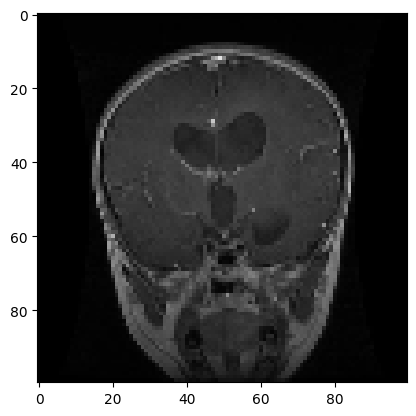

In [ ]:
plt.imshow(x_data[301])

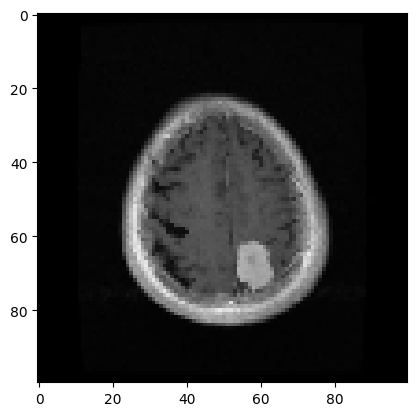

In [ ]:
plt.imshow(x_data[608])

In [ ]:
test_data = []
def create_data():
    for categories in Categories:
        path = os.path.join("/content/drive/MyDrive/DATASETS/Testing" , categories)
        class_name = categories
        for img in os.listdir(path):
            try:
                img_array = cv.imread(os.path.join(path,img))
                new_array = cv.resize(img_array , (100,100))
                test_data.append([new_array , class_name])
            except Exception as e:
                pass
create_data()

In [ ]:
test_data[0]

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 'glioma']

In [ ]:
random.shuffle(test_data)

In [ ]:
x_test = []
y_test = []
for features,labels in test_data:
    x_test.append(features)
    y_test.append(labels)

In [ ]:
x_test = np.array(x_test)

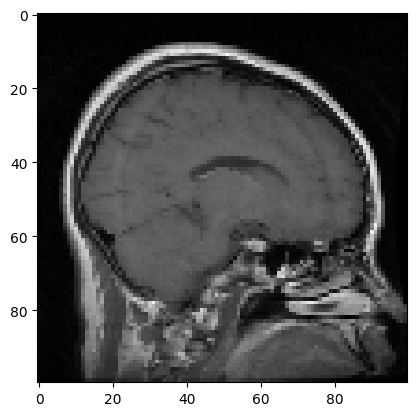

In [ ]:
plt.imshow(x_test[3])

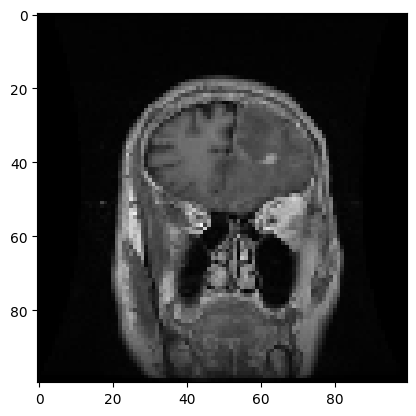

In [ ]:
plt.imshow(x_test[100])

In [ ]:
le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [ ]:
x_data.shape

(5722, 100, 100, 3)

In [ ]:
x_test.shape

(1311, 100, 100, 3)

In [ ]:
model = Sequential()
resnet = tf.keras.applications.resnet50.ResNet50(include_top=False,
                                       weights=None,
                                       input_shape=(100,100,3),
                                       classes=4)
model.add(resnet)
model.add(Flatten())
model.add(Dense(122,activation="relu"))
model.add(Dense(4,activation="softmax"))

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [ ]:
history = model.fit(x_data,y_data,validation_data=(x_test,y_test),epochs=10,batch_size=100)

Epoch 1/10
58/58 [==============================] - 1289s 22s/step - loss: 3.1159 - accuracy: 0.4056 - val_loss: 91487.9219 - val_accuracy: 0.3120
Epoch 2/10
58/58 [==============================] - 1237s 21s/step - loss: 1.0008 - accuracy: 0.6319 - val_loss: 1.2060 - val_accuracy: 0.4287
Epoch 3/10
58/58 [==============================] - 1208s 21s/step - loss: 0.7314 - accuracy: 0.7366 - val_loss: 0.9862 - val_accuracy: 0.5446
Epoch 4/10
58/58 [==============================] - 1214s 21s/step - loss: 0.4897 - accuracy: 0.8209 - val_loss: 0.7654 - val_accuracy: 0.6514
Epoch 5/10
58/58 [==============================] - 1206s 21s/step - loss: 0.4954 - accuracy: 0.8541 - val_loss: 0.8791 - val_accuracy: 0.5889
Epoch 6/10
58/58 [==============================] - 1178s 20s/step - loss: 0.2623 - accuracy: 0.9096 - val_loss: 0.5047 - val_accuracy: 0.7887
Epoch 7/10
58/58 [==============================] - 1202s 21s/step - loss: 0.2638 - accuracy: 0.9048 - val_loss: 0.5711 - val_accuracy: 0.

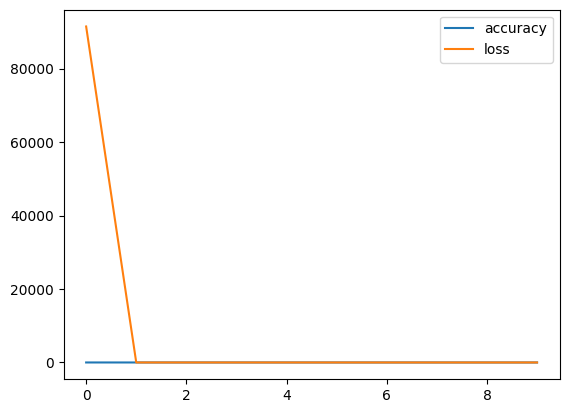

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["accuracy","loss"])

In [ ]:
y_pred = model.predict(x_test)

41/41 [==============================] - 71s 2s/step


In [ ]:
confusion_matrix(y_pred.argmax(axis=1),y_test)

array([[255,  19,   1,   7],
       [ 38, 277,  23,   9],
       [  0,   5, 379,   1],
       [  7,   5,   2, 283]])

In [ ]:
from sklearn.metrics import classification_report

# Make predictions using your trained model
y_pred = model.predict(x_test)

# Convert the one-hot encoded predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Print the classification report
report = classification_report(y_test, y_pred_labels, target_names=Categories)

# Print the classification report
print(report)


41/41 [==============================] - 55s 1s/step
              precision    recall  f1-score   support

      glioma       0.90      0.85      0.88       300
  meningioma       0.80      0.91      0.85       306
     notumor       0.98      0.94      0.96       405
   pituitary       0.95      0.94      0.95       300

    accuracy                           0.91      1311
   macro avg       0.91      0.91      0.91      1311
weighted avg       0.92      0.91      0.91      1311



In [ ]:
accuracy_score(y_pred.argmax(axis=1),y_test)

0.9107551487414187